1. Generate expert dataset from csv file

In [ ]:
import pandas as pd
from tianshou.data import ReplayBuffer, Batch
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('pendulum_data_new.csv')

# Initialize the Replay Buffer
buffer_size = len(df)
expert_buffer = ReplayBuffer(buffer_size)

# Populate the Replay Buffer
for i in range(buffer_size):
    obs = np.array(df.loc[i, 'observations'][1:-1].split(', '), dtype=float)
    act = np.array([df.loc[i, 'actions']], dtype=float)
    rew = df.loc[i, 'rewards']
    done = df.loc[i, 'terminals']
    next_obs = np.array(df.loc[i, 'next_observations'][1:-1].split(', '), dtype=float)
    
    # Assuming no truncation information is available, use the done flag for terminated
    # and False for truncated (change this based on your specific case)
    terminated = done
    truncated = False

    expert_buffer.add(
        Batch(
            obs=obs,
            act=act,
            rew=rew,
            done=done,
            obs_next=next_obs,
            terminated=terminated,
            truncated=truncated
        )
    )
print("Data loaded into Tianshou Replay Buffer.")

Check data format in csv file (obsolete)

In [ ]:
# Process and save the data
transition_data = []
for i in range(len(expert_buffer)):
    transition = expert_buffer[i]
    print("--- Transition {} ---".format(i))
    print(transition.obs)
    print(transition.act)
    print(transition.rew)
    print(transition.done)
    print(transition.obs_next)
    print("--- End of Transition {} ---".format(i))
    transition_data.append(
        Batch(
            obs=transition.obs,
            act=transition.act,
            rew=transition.rew,
            done=transition.done,
            obs_next=transition.obs_next
        )
    )

Save dataset to pickle file

In [ ]:
# Test saving the data to a pickle file
with open("test_expert_dataset.pkl", "wb") as f:
    pickle.dump(expert_buffer, f)
    print("Data saved to test_expert_dataset.pkl")

Check dataset structure

In [ ]:
# expert_buffer._meta
# print(expert_buffer._meta)
print(expert_buffer._meta.__dict__.keys())
print(expert_buffer._reserved_keys)
# expert_buffer_act = expert_buffer._meta.__dict__['act'].astype(np.float32)
# print(expert_buffer_act)

2. Check data format in read from pickle file

In [214]:
import pandas as pd
from tianshou.data import ReplayBuffer, Batch
import numpy as np
import pickle
import matplotlib.pyplot as plt

def load_buffer(file_name):
    try:
        with open(file_name, "rb") as f:
            buffer = pickle.load(f)
        print("Loaded expert buffer from {}".format(file_name))
        return buffer
    except FileNotFoundError:
        print("File not found: {}".format(file_name))
        return None
    except Exception as e:
        print("An error occurred while loading the buffer: {}".format(e))
        return None

# Specify the file name directly
# file_name = "expert_SAC_Pendulum-v1.pkl"
file_name = r"expert_MPC_PH96_001003005007_combined_40.pkl"

# Load the buffer
buffer = load_buffer(file_name)

# Print the attributes of the buffer
print(buffer.maxsize)
print(buffer._meta.__dict__.keys())
print(buffer._meta.__dict__['obs'].astype(np.float32))

# Chech the range of observations, maximum and minimum values in obeervations
print(np.max(buffer._meta.__dict__['obs'].astype(np.float32)))
print(np.min(buffer._meta.__dict__['obs'].astype(np.float32)))

# Plot the first element of the observations
# plt.plot(buffer._meta.__dict__['obs'].astype(np.float32)[:,0])
# plt.show()

# Plot the rewards
# plt.plot(buffer._meta.__dict__['rew'].astype(np.float32))
# plt.show()

# Sum up the rewards
print(np.sum(buffer._meta.__dict__['rew'].astype(np.float32)))

Loaded expert buffer from expert_MPC_PH96_001003005007_combined_40.pkl
26880
dict_keys(['obs', 'act', 'rew', 'terminated', 'truncated', 'done', 'obs_next', 'info', 'policy'])
[[-1.7141016e+00  2.2922406e-01 -1.1920837e+00 ... -1.9807415e+00
  -1.9898919e+00 -1.9990628e+00]
 [-1.6780152e+00 -4.3557569e-01 -1.2280731e+00 ... -1.9807415e+00
  -1.9898919e+00 -1.9990628e+00]
 [-1.6419289e+00 -1.3132173e+00 -1.2681367e+00 ... -1.9807415e+00
  -1.9898919e+00 -1.2723619e+00]
 ...
 [ 8.3700000e+04  2.9744742e+02  2.9861798e+02 ...  5.6433606e+02
   3.0841061e+02  5.3179443e+02]
 [ 8.4600000e+04  2.9671817e+02  2.9847336e+02 ...  3.0841061e+02
   5.3179443e+02  4.5095679e+02]
 [ 8.5500000e+04  2.9765891e+02  2.9831708e+02 ...  5.3179443e+02
   4.5095679e+02  5.5221838e+02]]
85500.0
-2.450086
-25293.697


In [ ]:
import pickle
from tianshou.data import ReplayBuffer

# Load the pickle file
file_name = "expert_SAC_JModelicaCSSingleZoneEnv-action-v2.pkl" 
# file_name1 = "expert_SAC_JModelicaCSSingleZoneEnv-action-v2.pkl"
file_name1 = "expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96.pkl"

with open(file_name, "rb") as f:
    loaded_data = pickle.load(f)
with open(file_name1, "rb") as f:
    loaded_data1 = pickle.load(f)

# Initialize the Replay Buffer
buffer_size = len(loaded_data)
expert_buffer = ReplayBuffer(buffer_size)
buffer_size1 = len(loaded_data1)
expert_buffer1 = ReplayBuffer(buffer_size1)

# Populate the Replay Buffer
for data in loaded_data:
    # If data is already a Batch object or similar
    expert_buffer.add(data)
    # If data is not a Batch object, you need to convert it. Example:
    # expert_buffer.add(
    #     Batch(
    #         obs=data['obs'],
    #         act=data['act'],
    #         rew=data['rew'],
    #         done=data['done'],
    #         obs_next=data['obs_next'],
    #         terminated=data.get('terminated', data['done']),  # Use 'done' if 'terminated' is not available
    #         truncated=data.get('truncated', False)  # Default to False if not available
    #     )
    # )

for data in loaded_data1:
    # If data is already a Batch object or similar
    expert_buffer1.add(data)

print("Data loaded into Tianshou Replay Buffer.")

In [ ]:
from tianshou.utils.statistics import RunningMeanStd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# rms = RunningMeanStd()

# Update running mean and standard deviation based on the observations
# obs_array = expert_buffer._meta.__dict__['obs']  # Extract observations as ndarray
# rms.update(obs_array)
# # Normalize the observations
# normalized_obs = rms.norm(obs_array)
# # Replace the original observations with normalized observations
# expert_buffer._meta.__dict__['obs'] = normalized_obs

# # Update running mean and standard deviation based on the next observations
# obs_next_array = expert_buffer._meta.__dict__['obs_next']  # Extract observations as ndarray
# rms.update(obs_next_array)
# # Normalize the observations
# normalized_obs_next = rms.norm(obs_next_array)
# # Replace the original observations with normalized observations
# expert_buffer._meta.__dict__['obs_next'] = normalized_obs_next


# Print the attributes of the buffer
print(expert_buffer._meta.__dict__.keys())
# expert_buffer._meta.__dict__['obs_next'][-1][0] = 86400.0
# print(expert_buffer._meta.__dict__['obs'].astype(np.float32))

# Print each transition's first element of the observations, then combine them into a list
time_index_mpc = []
for i in range(len(expert_buffer1)):
    time_index_mpc.append(expert_buffer1[i].act[0])
    # print(expert_buffer1[i].obs[0])
print(time_index_mpc)

time_index_ppo = []
for i in range(len(expert_buffer)):
    time_index_ppo.append(expert_buffer[i].act[0])
    # print(expert_buffer[i].obs[0])
print(time_index_ppo)

diff = []
for i in range(len(expert_buffer)):
    diff.append(time_index_mpc[i] - time_index_ppo[i])
print(diff)

# Save time_index_mpc and time_index_ppo to a csv file
df = pd.DataFrame({'time_index_mpc': time_index_mpc, 'time_index_ppo': time_index_ppo, 'diff': diff})
df.to_csv('sac_mpc_act.csv', index=False)

# # Plot time_index_mpc and time_index_ppo to compare
# plt.plot(time_index_mpc, label='MPC')
# plt.plot(time_index_ppo, label='PPO')
# plt.plot(diff, label='MPC - PPO')
# plt.legend()
# plt.show()

# print(expert_buffer._meta.__dict__['obs_next'].astype(np.float32))
# print(len(expert_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(expert_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward
print(np.sum(expert_buffer._meta.__dict__['rew'].astype(np.float32)))

# Save the expert buffer to a pickle file with customised name
# file_name = "expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32.pkl"
# with open(file_name, "wb") as f:
#     pickle.dump(expert_buffer, f)
#     print("Data saved to {}".format(file_name))

In [ ]:
# Plot the diff
plt.plot(diff)
plt.show()

Combine two datasets

In [166]:
# Load the ReplayBuffers from pickle files

with open("expert_MPC_PH32-48-96_001003_combined_30.pkl", "rb") as f:
    buffer2 = pickle.load(f)

with open("expert_MPC_PH32-48-96_005_combined_15.pkl", "rb") as f:
    buffer1 = pickle.load(f)
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH48
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32
    
# with open("expert_MPC_PH32-48-96_005_combined_30.pkl", "rb") as f:
    # buffer3 = pickle.load(f)

# with open("expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH8.pkl", "rb") as f:
#     buffer4 = pickle.load(f)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=len(buffer1) + len(buffer2) 
                            #    + len(buffer3) 
                            #    + len(buffer4)
                               )

# Add experiences from the first buffer
for experience in buffer1:
    combined_buffer.add(experience)

# Add experiences from the second buffer
for experience in buffer2:
    combined_buffer.add(experience)

# Add experiences from the third buffer
# for experience in buffer3:
#     combined_buffer.add(experience)

# # Add experiences from the fourth buffer
# for experience in buffer4:
#     combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

print(combined_buffer._meta.__dict__['obs'].astype(np.float32))
# print(len(combined_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(combined_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward and compare with the original buffer
print(np.sum(combined_buffer._meta.__dict__['rew'].astype(np.float32)))
print(np.sum(buffer1._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer2._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer3._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer4._meta.__dict__['rew'].astype(np.float32))
      )

# Save the expert buffer to a pickle file with customised name
file_name = "expert_MPC_PH32-48-96_135_combined_45.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[-1.7141016e+00 -8.0992681e-01 -1.1920837e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.4172076e-01]
 [-1.6780152e+00 -1.0528976e+00 -1.2280731e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.4172076e-01]
 [-1.6419289e+00 -1.1329367e+00 -1.2681367e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.3677483e-01]
 ...
 [ 8.3700000e+04  3.0263492e+02  2.9861798e+02 ...  3.8945252e-01
   3.8212303e+01  3.3990730e+01]
 [ 8.4600000e+04  3.0256873e+02  2.9847336e+02 ...  3.8212303e+01
   3.3990730e+01  3.3299599e+01]
 [ 8.5500000e+04  3.0236786e+02  2.9831708e+02 ...  3.3990730e+01
   3.3299599e+01  1.5761363e+01]]
-26940.758
-26940.758
Data saved to expert_MPC_PH32-48-96_135_combined_45.pkl


Combine 10 buffers

In [99]:
import pickle
import numpy as np

# Assuming ReplayBuffer is already defined or imported

# Generate file names dynamically
file_names = [f"expert_MPC_PH96_006_{i}.pkl" for i in range(1, 10)]

# Load the ReplayBuffers from pickle files
buffers = []
total_size = 0
for file_name in file_names:
    with open(file_name, "rb") as f:
        buffer = pickle.load(f)
        buffers.append(buffer)
        total_size += len(buffer)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=total_size)

# Add experiences from each buffer
for buffer in buffers:
    for experience in buffer:
        combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

# Assuming you need to access these attributes in a specific way
print(combined_buffer._meta.__dict__['obs'].astype(np.float32))

# Calculate and print the total reward
total_reward = np.sum([np.sum(buffer._meta.__dict__['rew'].astype(np.float32)) for buffer in buffers])
print(total_reward)

# Uncomment to save the combined buffer to a pickle file
file_name = "expert_MPC_PH96_006_combined-1-9.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[    0.        298.15      293.15    ...     0.          0.
      0.     ]
 [  900.        296.37973   293.00803 ...     0.          0.
      0.     ]
 [ 1800.        294.12537   292.85    ...     0.          0.
    144.64673]
 ...
 [83700.        297.075     298.61798 ...   209.6507    283.81104
    477.99078]
 [84600.        297.81134   298.47336 ...   283.81104   477.99078
    549.5837 ]
 [85500.        296.93906   298.31708 ...   477.99078   549.5837
    404.73956]]
-6213.909
Data saved to expert_MPC_PH96_006_combined-1-9.pkl


In [169]:
# Load the ReplayBuffers from pickle files

with open("expert_MPC_PH32-48-96_135_combined_45.pkl", "rb") as f:
    buffer1 = pickle.load(f)

with open("expert_MPC_PH32-48-96_002_combined_15.pkl", "rb") as f:
    buffer2 = pickle.load(f)
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH96
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH48
# expert_MPC_JModelicaCSSingleZoneEnv-action-v2-PH32
    
with open("expert_MPC_PH32-48-96_004_combined_15.pkl", "rb") as f:
    buffer3 = pickle.load(f)

# with open("expert_buffer_MPC_JModelicaCSSingleZoneEnv-action-v2-PH8.pkl", "rb") as f:
#     buffer4 = pickle.load(f)

# Create a new ReplayBuffer with enough size
combined_buffer = ReplayBuffer(size=len(buffer1) + len(buffer2) 
                               + len(buffer3) 
                            #    + len(buffer4)
                               )

# Add experiences from the first buffer
for experience in buffer1:
    combined_buffer.add(experience)

# Add experiences from the second buffer
for experience in buffer2:
    combined_buffer.add(experience)

# Add experiences from the third buffer
for experience in buffer3:
    combined_buffer.add(experience)

# # Add experiences from the fourth buffer
# for experience in buffer4:
#     combined_buffer.add(experience)

# Print message to confirm the buffer is loaded
print("Data loaded into Tianshou Replay Buffer.")

print(combined_buffer._meta.__dict__['obs'].astype(np.float32))
# print(len(combined_buffer._meta.__dict__['obs'].astype(np.float32)))
# print(len(combined_buffer._meta.__dict__['obs_next'].astype(np.float32)))

# Calculate the total reward and compare with the original buffer
print(np.sum(combined_buffer._meta.__dict__['rew'].astype(np.float32)))
print(np.sum(buffer1._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer2._meta.__dict__['rew'].astype(np.float32)) 
      + np.sum(buffer3._meta.__dict__['rew'].astype(np.float32)) 
    #   + np.sum(buffer4._meta.__dict__['rew'].astype(np.float32))
      )

# Save the expert buffer to a pickle file with customised name
file_name = "expert_MPC_PH32-48-96_12345_combined_75.pkl"
with open(file_name, "wb") as f:
    pickle.dump(combined_buffer, f)
    print("Data saved to {}".format(file_name))

Data loaded into Tianshou Replay Buffer.
[[-1.7141016e+00 -8.0992681e-01 -1.1920837e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.4172076e-01]
 [-1.6780152e+00 -1.0528976e+00 -1.2280731e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.4172076e-01]
 [-1.6419289e+00 -1.1329367e+00 -1.2681367e+00 ... -8.4171855e-01
  -8.4171927e-01 -8.3677483e-01]
 ...
 [ 8.3700000e+04  2.9814224e+02  2.9861798e+02 ...  2.6472705e+02
   5.6066302e+02  4.7795535e+02]
 [ 8.4600000e+04  2.9664008e+02  2.9847336e+02 ...  5.6066302e+02
   4.7795535e+02  3.1937381e+02]
 [ 8.5500000e+04  2.9657520e+02  2.9831708e+02 ...  4.7795535e+02
   3.1937381e+02  5.5001691e+02]]
-44776.36
-44776.355
Data saved to expert_MPC_PH32-48-96_12345_combined_75.pkl


Test normalization of time index

In [ ]:
sequence = np.arange(900, 86400, 900)
print(sequence)
rms = RunningMeanStd()
rms.update(sequence)
normalized_sequence = rms.norm(sequence)
print(normalized_sequence)

In [ ]:
# Test saving the data to a pickle file
with open("test_expert_dataset_Pendulum-v1.pkl", "wb") as f:
    pickle.dump(expert_buffer, f)
    print("Data saved to test_expert_dataset_Pendulum-v1.pkl")

Generate vectortized reply buffer from pickle file (Need fix, since saved pickle file can not be used in gail)

In [ ]:
from tianshou.data import VectorReplayBuffer, ReplayBuffer
import pickle

# Load the pickle file
file_name = "expert_SAC_Pendulum-v1.pkl"  # Replace with your pickle file name
with open(file_name, "rb") as f:
    original_vector_buffer = pickle.load(f)

# Initialize a new VectorReplayBuffer with the same number of buffers and buffer size
num_buffers = len(original_vector_buffer.buffers)
print("Number of buffers: {}".format(num_buffers))
buffer_size = len(original_vector_buffer)
print("Buffer size: {}".format(buffer_size))
new_vector_buffer = VectorReplayBuffer(buffer_size, num_buffers)

# Populate the new VectorReplayBuffer
for buf_index, buf in enumerate(original_vector_buffer.buffers):
    for transition in buf:
        # Add directly to the corresponding buffer
        new_vector_buffer.buffers[buf_index].add(transition)

print("Data loaded into new VectorReplayBuffer.")

In [ ]:
# Number of buffers
# num_buffers = 16

# Initialize individual replay buffers
# Assuming all buffers have the same size, e.g., 1000
# buffers = [original_vector_buffer for _ in range(num_buffers)]

# Create a VectorReplayBuffer instance with the list of buffers
# vector_buffer = VectorReplayBuffer(buffers, buffer_num=num_buffers)

# Now the vector_buffer is ready to use
# print(vector_buffer)

new_vector_buffer
# original_vector_buffer

In [ ]:
new_vector_buffer

# Print the attributes of the buffer
print(new_vector_buffer.buffers[15]._meta.__dict__.keys())
# print(new_vector_buffer._meta.__dict__['obs'].astype(np.float32))

# print('====Fowlloing is for checking====')
# # Example: Inspecting the first few transitions in each sub-buffer
# for buf_index, buf in enumerate(new_vector_buffer.buffers):
#     print(f"Buffer {buf_index}:")
#     for i in range(min(len(buf), 5)):  # Print first 5 transitions of each buffer
#         transition = buf[i]
#         print(f"  Transition {i}: {transition}")
#     print()  # Blank line for readability

In [ ]:
# Test saving the data to a pickle file
with open("test_vector_expert_dataset_Pendulum-v1.pkl", "wb") as f:
    pickle.dump(new_vector_buffer, f)
    print("Data saved to test_vector_expert_dataset_Pendulum-v1.pkl")

Read expert dataset from saved pickle file

In [ ]:
import pickle
# from tianshou.data import VectorReplayBuffer  # Uncomment if needed

# Path to your pickle file containing the VectorReplayBuffer
pickle_file_path = 'expert_SAC_Pendulum-v1.pkl'

# Load the buffer from the pickle file
with open(pickle_file_path, 'rb') as file:
    buffer = pickle.load(file) # vectorized replay buffer, a VectorReplayBuffer object (used for the next two cells)
    buffer = buffer.buffers[0] # One of the replay buffers in the vectorized replay buffer (used for this cell only)

# Print the buffer metadata
print(dir(buffer)) 

# Print the keys of the metadata
print(buffer._meta.__dict__.keys())

# Check and print if done and truncated and terminated are all False, print the index that is True
# for i in range(len(buffer)):
#     if buffer._meta.__dict__['done'][i] or buffer._meta.__dict__['truncated'][i] or buffer._meta.__dict__['terminated'][i]:
#         print(i)
#         print(buffer._meta.__dict__['done'][i])
#         print(buffer._meta.__dict__['truncated'][i])
#         print(buffer._meta.__dict__['terminated'][i])
#         break

# Print the index of true in the done, truncated and terminated
print(np.where(buffer._meta.__dict__['done']))
print(np.where(buffer._meta.__dict__['truncated']))
print(np.where(buffer._meta.__dict__['terminated']))

# Print all transitions when done is True
for i in range(len(buffer)):
    if buffer._meta.__dict__['done'][i]:
        print("--- Transition {} ---".format(i))
        print(buffer._meta.__dict__['obs'][i])
        print(buffer._meta.__dict__['act'][i])
        print(buffer._meta.__dict__['rew'][i])
        print(buffer._meta.__dict__['done'][i])
        print(buffer._meta.__dict__['obs_next'][i])
        print("--- End of Transition {} ---".format(i))

Following is based on vectorized replay buffer objective

In [ ]:
# Using __len__ to get the current size of the buffer
buffer_size = len(buffer)
print(f"Current Size of the Buffer: {buffer_size}")

# Using maxsize to get the maximum capacity of the buffer
buffer_capacity = buffer.maxsize
print(f"Maximum Capacity of the Buffer: {buffer_capacity}")

# Additional metadata
buffer_num = buffer.buffer_num
print(f"Number of Buffers: {buffer_num}")

stack_num = buffer.stack_num
print(f"Number of Stacked Frames: {stack_num}")

# Access the first buffer (if it's a VectorReplayBuffer)
single_buffer = buffer.buffers[0]

# Check if the buffer is not empty
if len(single_buffer) > 0:
    # Accessing the first transition
    # This depends on how the data is structured in your buffer
    # For example, if transitions are stored in a list-like structure
    first_transition = single_buffer[0]

    # Now, print the contents of the first transition
    print("First Transition Contents:")
    for key, value in first_transition.items():
        print(f"{key}: {value}")
else:
    print("The buffer is empty.")

Access the expert dataset in a single buffer

In [ ]:
# Access a specific buffer from the VectorReplayBuffer
specific_buffer = buffer.buffers[0]

# Now you can print this buffer or inspect its contents
print("Specific Buffer:", specific_buffer)

# To inspect details of this buffer, you can use dir() or access its attributes
# For example, printing the size of this specific buffer
print("Size of the Specific Buffer:", len(specific_buffer))

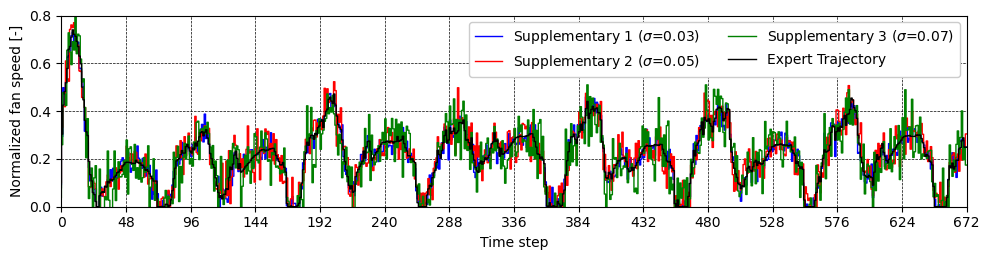

In [349]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Load the action trajectory from a JSON file
# Replace the file path with the path to your JSON file
file_path = 'PH96/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories with different noise levels
def create_noisy_trajectories_different_noise(original_trajectory, noise_levels):
    return [add_noise_to_trajectory(original_trajectory, level) for level in noise_levels]

# Different noise levels for each trajectory
noise_levels = [0.03, 0.05, 0.07]  # Noise levels for the trajectories
color_list = ['blue', 'red', 'green', 'orange']  # Colors for the trajectories

# Generate noisy trajectories with different noise levels
noisy_trajectories_diff_noise = create_noisy_trajectories_different_noise(u_opt, noise_levels)

# Plotting the original trajectory and noisy trajectories with different noise levels
plt.figure(figsize=(10, 2.7))
for i, traj in enumerate(noisy_trajectories_diff_noise):
    plt.step(range(len(traj)), traj, label=f'Supplementary {i+1} ($\sigma$={noise_levels[i]})', linewidth=1, color=color_list[i])
plt.step(range(len(traj)), u_opt, label='Expert Trajectory', linewidth=1, color='black')

plt.xlim(0, 672)
plt.xticks(np.arange(0, len(u_opt), 48))
plt.ylim(0, 0.8)
plt.yticks(np.arange(0, 0.81, 0.2))
plt.grid(color='black', linewidth=0.5, alpha=1, linestyle='--')

plt.xlabel('Time step')
plt.ylabel('Normalized fan speed [-]')
# plt.title('Original and Noisy Action Trajectories with Different Noise Levels')
plt.legend(ncol=2, loc='best', framealpha=1)
plt.tight_layout()
# plt.savefig('PH96/Original and Noisy Action Trajectories with Different Noise Levels.pdf', dpi=300)
plt.show()

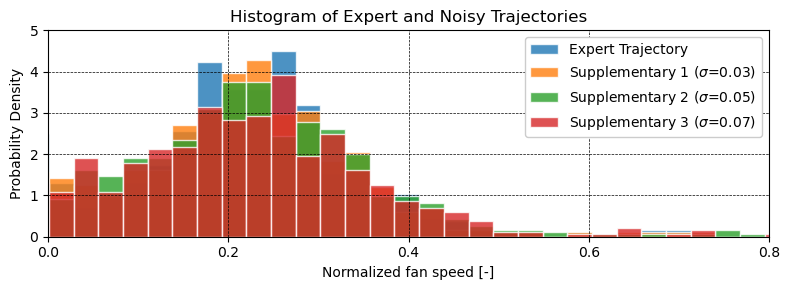

In [305]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Load the action trajectory from a JSON file
file_path = 'PH96/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories with different noise levels
def create_noisy_trajectories_different_noise(original_trajectory, noise_levels):
    return [add_noise_to_trajectory(original_trajectory, level) for level in noise_levels]

# Different noise levels for each trajectory
noise_levels = [0.03, 0.05, 0.07]

# Generate noisy trajectories with different noise levels
noisy_trajectories_diff_noise = create_noisy_trajectories_different_noise(u_opt, noise_levels)

# Plotting the distribution of the original and noisy trajectories using histograms
plt.figure(figsize=(8, 3))

# Define the number of bins for the histogram and ensure it is 1D
bins = np.linspace(np.min(np.concatenate((u_opt, *noisy_trajectories_diff_noise))), 
                   np.max(np.concatenate((u_opt, *noisy_trajectories_diff_noise))), 40)

# Plot histograms
for i, traj in enumerate([u_opt] + noisy_trajectories_diff_noise):
    if i == 0:
        plt.hist(traj, bins=bins, alpha=0.8, label='Expert Trajectory', edgecolor='white', density=True)

    else:
        plt.hist(traj, bins=bins, alpha=0.8, label=f'Supplementary {i} ($\sigma$={noise_levels[i-1]})', edgecolor='white', density=True)

plt.xlim(0, 0.8)
plt.xticks(np.arange(0, 0.81, 0.2))
plt.grid(color='black', linewidth=0.5, alpha=1, linestyle='--')
plt.yticks(np.arange(0, 6, 1))

plt.xlabel('Normalized fan speed [-]')
plt.ylabel('Probability Density')
plt.title('Histogram of Expert and Noisy Trajectories')
plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

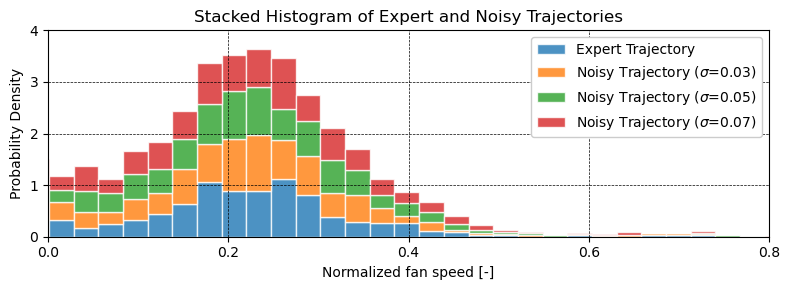

In [306]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Load the action trajectory from a JSON file
file_path = 'PH96/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt']).flatten()

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return noise + trajectory

# Function to create multiple noisy trajectories with different noise levels
def create_noisy_trajectories_different_noise(original_trajectory, noise_levels):
    return [add_noise_to_trajectory(original_trajectory, level).flatten() for level in noise_levels]

# Different noise levels for each trajectory
noise_levels = [0.03, 0.05, 0.07]

# Generate noisy trajectories with different noise levels
noisy_trajectories_diff_noise = create_noisy_trajectories_different_noise(u_opt, noise_levels)

# Plotting the distribution of the original and noisy trajectories using stacked histograms
plt.figure(figsize=(8, 3))

# Calculate the range for bins
range_min = min(u_opt.min(), min(traj.min() for traj in noisy_trajectories_diff_noise))
range_max = max(u_opt.max(), max(traj.max() for traj in noisy_trajectories_diff_noise))

# Define the number of bins for the histogram
bins = np.linspace(range_min, range_max, 40)

# Plot stacked histograms
labels = ['Expert Trajectory'] + [f'Noisy Trajectory ($\sigma$={sigma})' for sigma in noise_levels]
plt.hist([u_opt] + noisy_trajectories_diff_noise, alpha=0.8, bins=bins, stacked=True, edgecolor='white', label=labels, density=True)

plt.xlim(0, 0.8)
plt.xticks(np.arange(0, 0.81, 0.2))
plt.grid(color='black', linewidth=0.5, alpha=1, linestyle='--')
plt.yticks(np.arange(0, 5, 1))

plt.xlabel('Normalized fan speed [-]')
plt.ylabel('Probability Density')
plt.title('Stacked Histogram of Expert and Noisy Trajectories')
plt.legend(framealpha=1)
plt.tight_layout()
plt.show()

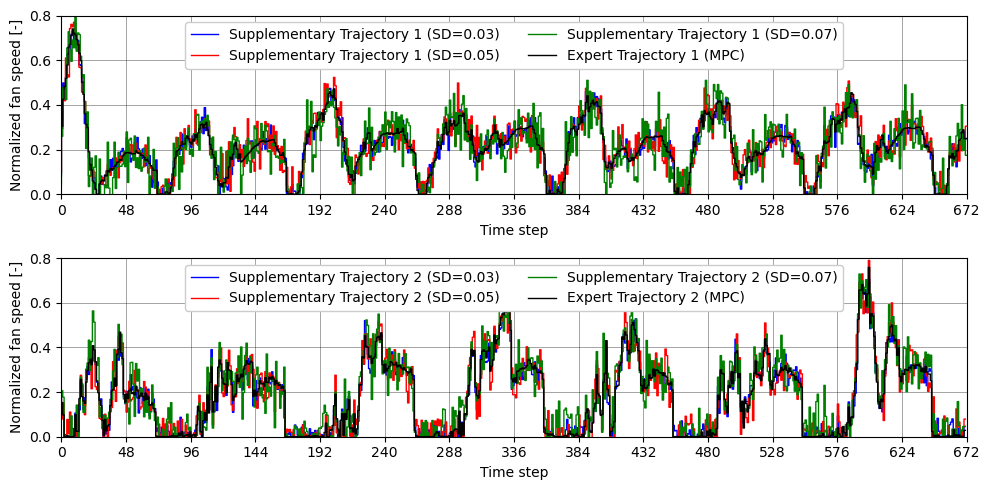

In [307]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# Load the action trajectory from JSON files
file_paths = ['PH96/u_opt.json', 'PH48/u_opt.json']  # Paths for both JSON files
data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        data.append(json.load(file))

# Extract the action trajectories
u_opts = [np.array(d['u_opt']) for d in data]

# Functions as defined earlier
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

def create_noisy_trajectories_different_noise(original_trajectory, noise_levels):
    return [add_noise_to_trajectory(original_trajectory, level) for level in noise_levels]

# Settings
noise_levels = [0.03, 0.05, 0.07]
color_list = ['blue', 'red', 'green', 'orange']

# Generate noisy trajectories for both datasets
noisy_trajectories = [create_noisy_trajectories_different_noise(u_opt, noise_levels) for u_opt in u_opts]

plt.figure(figsize=(10, 5))  # Adjusted for better layout

# Plotting loop for both datasets
for idx, (u_opt, noisy_trajectories_diff_noise) in enumerate(zip(u_opts, noisy_trajectories)):
    # Subplot for each dataset
    plt.subplot(2, 1, idx + 1)  # 2 rows, 1 column, idx-th subplot
    for i, traj in enumerate(noisy_trajectories_diff_noise):
        plt.step(range(len(traj)), traj, label=f'Supplementary Trajectory {idx+1} (SD={noise_levels[i]})', linewidth=1, color=color_list[i])
    plt.step(range(len(traj)), u_opt, label=f'Expert Trajectory {idx+1} (MPC)', linewidth=1, color='black')

    plt.xlim(0, 672)
    plt.xticks(np.arange(0, len(u_opt)+1, 48))
    plt.ylim(0, 0.8)
    plt.yticks(np.arange(0, 0.81, 0.2))
    plt.grid(color='black', linewidth=0.5, alpha=0.5)

    plt.xlabel('Time step')
    plt.ylabel('Normalized fan speed [-]')
    plt.legend(ncol=2, loc='upper center', framealpha=1)

plt.tight_layout()
plt.show()

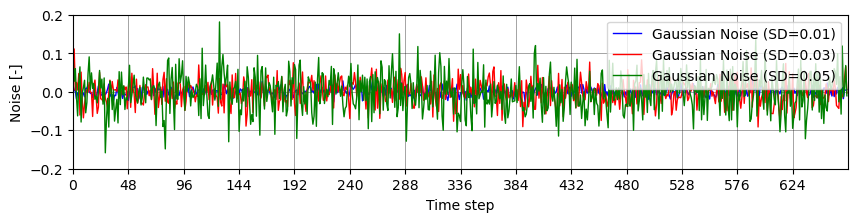

In [7]:
import numpy as np
import matplotlib.pyplot as plt

noise_levels = [0.01, 0.03, 0.05]  # Noise levels for the trajectories
color_list = ['blue', 'red', 'green', 'orange']  # Colors for the trajectories

np.random.seed(3)

# Generate Gaussian noise with different noise levels
noises = [np.random.normal(0, level, 672) for level in noise_levels]

# Plot the Gaussian noise with different noise levels
plt.figure(figsize=(10, 2))
for i, noise in enumerate(noises):
    plt.plot(noise, label=f'Gaussian Noise (SD={noise_levels[i]})', linewidth=1, color=color_list[i])

plt.xlim(0, 672)
plt.xticks(np.arange(0, len(u_opt), 48))
plt.ylim(-0.2, 0.2)
plt.yticks(np.arange(-0.2, 0.21, 0.1))
plt.grid(color='black', linewidth=0.5, alpha=0.5)

plt.xlabel('Time step')
plt.ylabel('Noise [-]')
# plt.title('Gaussian Noise with Different Noise Levels')
plt.legend()
# plt.savefig('PH96/Gaussian Noise with Different Noise Levels.png', dpi=300)
plt.show()

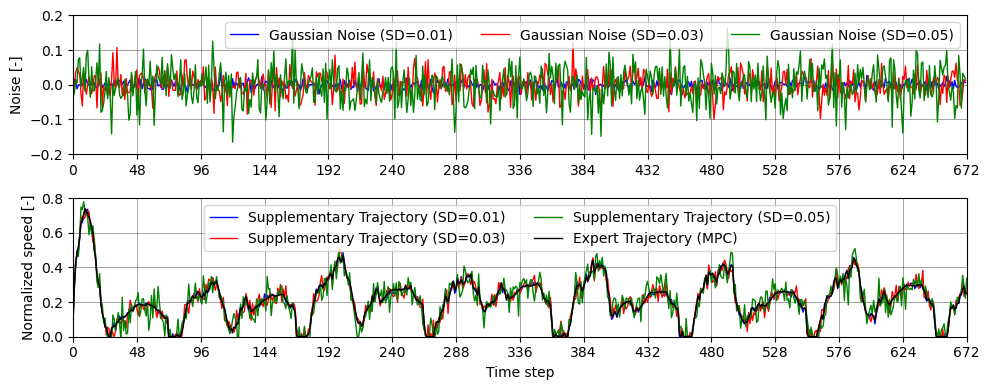

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

# Assuming the JSON file is already loaded as before
file_path = 'PH96/u_opt.json'
with open(file_path, 'r') as file:
    data = json.load(file)
u_opt = np.array(data['u_opt'])

# Functions as defined in the original script
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

def create_noisy_trajectories_different_noise(original_trajectory, noise_levels):
    return [add_noise_to_trajectory(original_trajectory, level) for level in noise_levels]

noise_levels = [0.01, 0.03, 0.05]
color_list = ['blue', 'red', 'green', 'orange']

# Generate noisy trajectories and Gaussian noise
noisy_trajectories_diff_noise = create_noisy_trajectories_different_noise(u_opt, noise_levels)
noises = [np.random.normal(0, level, 672) for level in noise_levels]

# Create a figure with 2x1 subplots
plt.figure(figsize=(10, 4))

# First subplot for the original and noisy trajectories
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 1st subplot
for i, traj in enumerate(noisy_trajectories_diff_noise):
    plt.plot(traj, label=f'Supplementary Trajectory (SD={noise_levels[i]})', linewidth=1, color=color_list[i])
plt.plot(u_opt, label='Expert Trajectory (MPC)', linewidth=1, color='black')
plt.xlim(0, 672)
plt.xticks(np.arange(0, len(u_opt), 48))
plt.ylim(0, 0.8)
plt.yticks(np.arange(0, 0.81, 0.2))
plt.grid(color='black', linewidth=0.5, alpha=0.5)
plt.xlabel('Time step')
plt.ylabel('Normalized speed [-]')
plt.legend(ncol=2)

# Second subplot for the Gaussian noise
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 2nd subplot
for i, noise in enumerate(noises):
    plt.plot(noise, label=f'Gaussian Noise (SD={noise_levels[i]})', linewidth=1, color=color_list[i])
plt.xlim(0, 672)
plt.xticks(np.arange(0, 672 + 1, 48))
plt.ylim(-0.2, 0.2)
plt.yticks(np.arange(-0.2, 0.21, 0.1))
plt.grid(color='black', linewidth=0.5, alpha=0.5)
# plt.xlabel('Time step')
plt.ylabel('Noise [-]')
plt.legend(ncol=3)

plt.tight_layout()
plt.show()

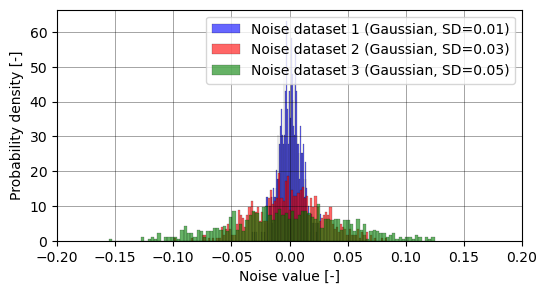

In [327]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
noise_levels = [0.01, 0.03, 0.05]  # Noise levels for the trajectories
color_list = ['blue', 'red', 'green']  # Colors for the trajectories (only three colors are needed)
np.random.seed(10)

# Generate Gaussian noise with different noise levels
noises = [np.random.normal(0, level, 672) for level in noise_levels]

# Setting transparency levels for each histogram
transparencies = [0.6, 0.6, 0.6]  # Higher transparency for larger SD

# Plot Gaussian distribution with different noise levels
plt.figure(figsize=(6, 3))
for i, noise in enumerate(noises):
    plt.hist(noise, bins=100, label=f'Noise dataset {i+1} (Gaussian, SD={noise_levels[i]})', color=color_list[i], alpha=transparencies[i], rwidth=1, edgecolor='black', linewidth=0.2, density=True)

# # Add density curve
# for i, noise in enumerate(noises):
#     density = np.random.normal(0, level, 100000)
#     plt.plot(np.sort(density), 1/(noise_levels[i] * np.sqrt(2 * np.pi)) * np.exp( - (np.sort(density) - 0)**2 / (2 * noise_levels[i]**2) ), color=color_list[i], linewidth=2)

plt.xlim(-0.2, 0.2)
plt.xticks(np.arange(-0.2, 0.21, 0.05))
# plt.ylim(0, 30)
# plt.yticks(np.arange(0, 31, 5))
plt.grid(color='black', linewidth=0.5, alpha=0.5)

plt.xlabel('Noise value [-]')
plt.ylabel('Probability density [-]')
# plt.title('Gaussian Noise with Different Noise Levels')
plt.legend()
# plt.savefig('PH96/Gaussian Noise with Different Noise Levels.pdf', dpi=300)
plt.show()

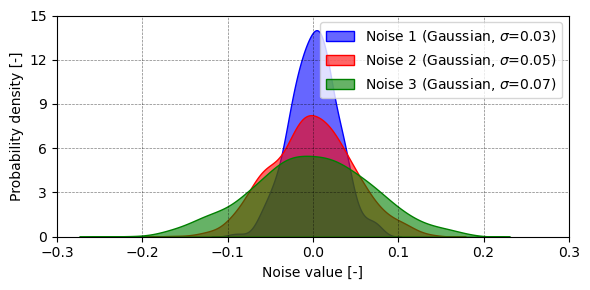

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is used for the KDE plot

# Given parameters
noise_levels = [0.03, 0.05, 0.07]  # Noise levels for the trajectories
color_list = ['blue', 'red', 'green']  # Colors for the trajectories
np.random.seed(10)

# Generate Gaussian noise with different noise levels
noises = [np.random.normal(0, level, 672) for level in noise_levels]

plt.figure(figsize=(6, 3))
for i, noise in enumerate(noises):
    # Using seaborn for KDE plot
    sns.kdeplot(noise, label=f'Noise {i+1} (Gaussian, $\sigma$={noise_levels[i]})', color=color_list[i], linewidth=1, fill=True, alpha=transparencies[i])

plt.xlim(-0.3, 0.3)
plt.xticks(np.arange(-0.3, 0.31, 0.1))
plt.ylim(0, 15)
plt.yticks(np.arange(0, 16, 3))
plt.grid(color='black', linewidth=0.5, alpha=0.5, linestyle='--')

plt.xlabel('Noise value [-]')
plt.ylabel('Probability density [-]')
plt.legend()
plt.tight_layout()
# plt.savefig('PH96/Gaussian Noise with Different Noise Levels.pdf', dpi=300)
plt.show()

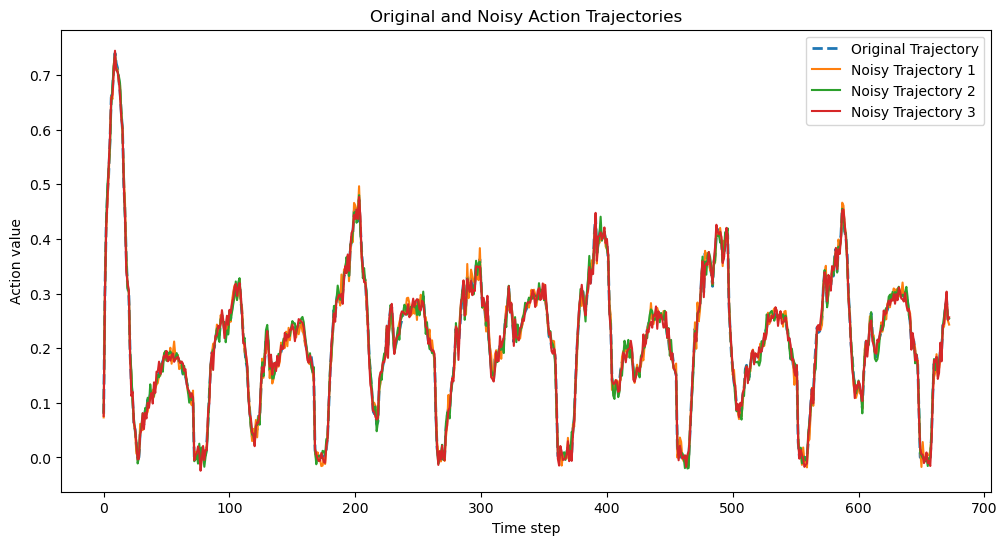

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the action trajectory from a JSON file
# Replace the file path with the path to your JSON file
file_path = 'PH96/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories
def create_noisy_trajectories(original_trajectory, num_trajectories, noise_level):
    return [add_noise_to_trajectory(original_trajectory, noise_level) for _ in range(num_trajectories)]

# Parameters for noise and number of trajectories
num_trajectories = 3  # Number of noisy trajectories to create
noise_level = 0.01  # Standard deviation of Gaussian noise

# Generate noisy trajectories
noisy_trajectories = create_noisy_trajectories(u_opt, num_trajectories, noise_level)

# Plotting the original and noisy trajectories
plt.figure(figsize=(12, 6))
plt.plot(u_opt, label='Original Trajectory', linewidth=2, linestyle='--')
for i, traj in enumerate(noisy_trajectories):
    plt.plot(traj, label=f'Noisy Trajectory {i+1}')
plt.xlabel('Time step')
plt.ylabel('Action value')
plt.title('Original and Noisy Action Trajectories')
plt.legend()
plt.show()

Trajectory saved as noisy_trajectory_1.json
Trajectory saved as noisy_trajectory_2.json
Trajectory saved as noisy_trajectory_3.json
Trajectory saved as noisy_trajectory_4.json
Trajectory saved as noisy_trajectory_5.json
Trajectory saved as noisy_trajectory_6.json
Trajectory saved as noisy_trajectory_7.json
Trajectory saved as noisy_trajectory_8.json
Trajectory saved as noisy_trajectory_9.json
Trajectory saved as noisy_trajectory_10.json


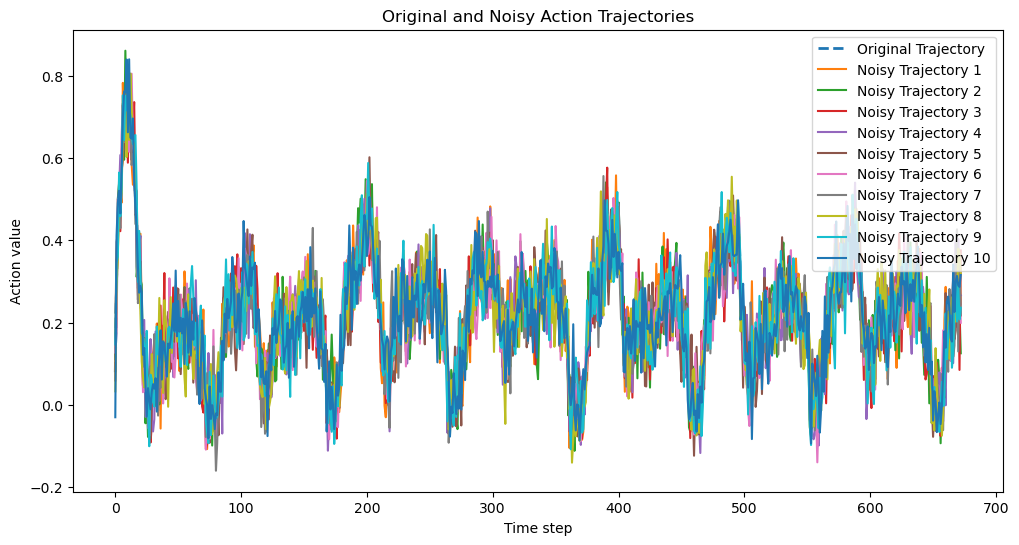

In [43]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the action trajectory from a JSON file
# Replace the file path with the path to your JSON file
file_path = 'PH96/u_opt.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the action trajectory
u_opt = np.array(data['u_opt'])

# Function to add Gaussian noise to the action trajectory
def add_noise_to_trajectory(trajectory, noise_level):
    noise = np.random.normal(0, noise_level, trajectory.shape)
    return trajectory + noise

# Function to create multiple noisy trajectories
def create_noisy_trajectories(original_trajectory, num_trajectories, noise_level):
    return [add_noise_to_trajectory(original_trajectory, noise_level) for _ in range(num_trajectories)]

# Function to save trajectory as a JSON file
def save_trajectory_as_json(trajectory, file_index):
    filename = f"noisy_trajectory_{file_index}.json"
    with open(filename, 'w') as file:
        json.dump({"u_opt": trajectory.tolist()}, file)
    print(f"Trajectory saved as {filename}")

# Parameters for noise and number of trajectories
num_trajectories = 10  # Number of noisy trajectories to create
noise_level = 0.06  # Standard deviation of Gaussian noise

# Generate noisy trajectories
noisy_trajectories = create_noisy_trajectories(u_opt, num_trajectories, noise_level)

# Save each noisy trajectory as a JSON file
for i, traj in enumerate(noisy_trajectories):
    save_trajectory_as_json(traj, i+1)

# Plotting the original and noisy trajectories
plt.figure(figsize=(12, 6))
plt.plot(u_opt, label='Original Trajectory', linewidth=2, linestyle='--')
for i, traj in enumerate(noisy_trajectories):
    plt.plot(traj, label=f'Noisy Trajectory {i+1}')
plt.xlabel('Time step')
plt.ylabel('Action value')
plt.title('Original and Noisy Action Trajectories')
plt.legend()
plt.show()

In [44]:
import json

# Load the original JSON file
original_file_path = 'PH96/u_opt.json'  # Update with your original JSON file path

# Base path for the noisy trajectory files
base_noisy_file_path = 'PH96/level_006/noisy_trajectory_{}.json'  # Update with your noisy trajectory file path pattern

# Process for each of the 10 previously saved noisy trajectories
for i in range(1, 11):
    # Construct the file path for the noisy trajectory
    noisy_file_path = base_noisy_file_path.format(i)

    # Read the noisy trajectory JSON file
    with open(noisy_file_path, 'r') as file:
        noisy_data = json.load(file)

    # Read the original JSON file
    with open(original_file_path, 'r') as file:
        original_data = json.load(file)

    # Replace the 'u_opt' in the original data with the noisy trajectory
    original_data['u_opt'] = noisy_data['u_opt']

    # Save the modified data to a new JSON file
    new_file_path = f'new_u_opt_{i}.json'  # The file will be saved with this name
    with open(new_file_path, 'w') as file:
        json.dump(original_data, file)

    print(f"New u_opt_json file saved at {new_file_path}")


New u_opt_json file saved at new_u_opt_1.json
New u_opt_json file saved at new_u_opt_2.json
New u_opt_json file saved at new_u_opt_3.json
New u_opt_json file saved at new_u_opt_4.json
New u_opt_json file saved at new_u_opt_5.json
New u_opt_json file saved at new_u_opt_6.json
New u_opt_json file saved at new_u_opt_7.json
New u_opt_json file saved at new_u_opt_8.json
New u_opt_json file saved at new_u_opt_9.json
New u_opt_json file saved at new_u_opt_10.json


Revise pkl file name

In [ ]:
import os

# Path to the directory containing the files
directory_path = "/path/to/directory"

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    # Check if it's a file, ends with '.pkl', and not a directory
    if os.path.isfile(os.path.join(directory_path, filename)) and filename.endswith('.pkl'):
        # Splitting the filename into parts
        parts = filename.split('_')

        # Filtering the parts to include only those needed
        filtered_parts = [part for part in parts if part not in ['level', 'new', 'u', 'opt']]

        # Joining the filtered parts back into a filename
        new_filename = '_'.join(filtered_parts)

        # Renaming the file
        os.rename(os.path.join(directory_path, filename), os.path.join(directory_path, new_filename))

# Print completion message
print("PKL files have been renamed.")